# 📑 Management Reporting Automation

Modern teams need repeatable, on-time reports — not manual copy-paste.  
This project automates KPI calculation and multi-sheet Excel reporting from raw e-commerce sales, so management gets consistent, refreshable outputs in seconds.

---

### 🎯 Objective
- Generate weekly/monthly MI reports automatically (KPIs, regional summary, trend sheet)  
- Reduce manual effort and errors in recurring reports  
- Produce a single Excel workbook ready to share with stakeholders

**Domain:** MI / Reporting Analyst  
**Tool:** Python (Google Colab)  
**Dataset:** `train.csv`


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load dataset
df = pd.read_csv('/content/train.csv')

# Standardize column names
df.columns = [c.strip().lower().replace(" ", "_").replace("-", "_") for c in df.columns]

# Preview
df.head()


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
# Convert date columns
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df['ship_date'] = pd.to_datetime(df['ship_date'], dayfirst=True)

# Fill missing postal codes with mode
df['postal_code'].fillna(df['postal_code'].mode()[0], inplace=True)

# Ensure numeric columns are valid
df['sales'] = df['sales'].astype(float)


/tmp/ipython-input-975495070.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['postal_code'].fillna(df['postal_code'].mode()[0], inplace=True)


In [4]:
total_sales = df['sales'].sum()
avg_sales = df['sales'].mean()
total_orders = df['order_id'].nunique()
unique_customers = df['customer_id'].nunique()
top_region = df.groupby('region')['sales'].sum().idxmax()

print("Total Sales:", round(total_sales, 2))
print("Average Sales per Order:", round(avg_sales, 2))
print("Total Orders:", total_orders)
print("Unique Customers:", unique_customers)
print("Top Performing Region:", top_region)


Total Sales: 2261536.78
Average Sales per Order: 230.77
Total Orders: 4922
Unique Customers: 793
Top Performing Region: West


## 📌 KPI Snapshot
- **Total Sales** — overall revenue across the period  
- **Average Sales per Order** — revenue quality per order  
- **Total Orders** — business volume  
- **Unique Customers** — breadth of customer base  
- **Top Region** — where we’re winning most

> These KPIs refresh automatically whenever new data is fed in.


/tmp/ipython-input-3813403365.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='sales', data=df, estimator='sum', ci=None, palette='pastel')
/tmp/ipython-input-3813403365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='sales', data=df, estimator='sum', ci=None, palette='pastel')


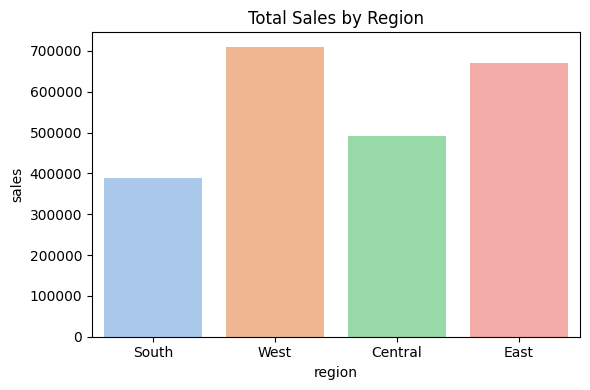

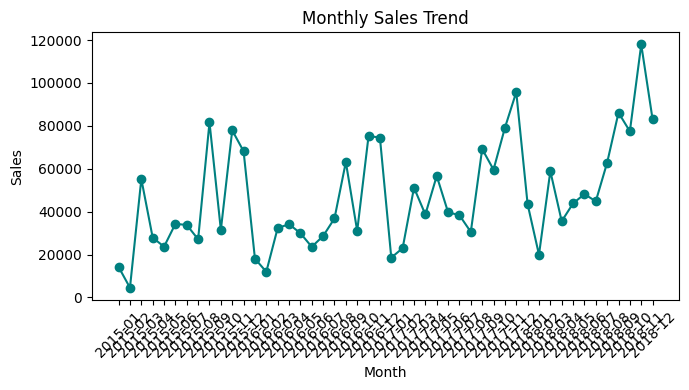

In [5]:
# Sales by region
plt.figure(figsize=(6,4))
sns.barplot(x='region', y='sales', data=df, estimator='sum', ci=None, palette='pastel')
plt.title('Total Sales by Region')
plt.tight_layout()
plt.savefig('/content/sales_by_region.png', dpi=150)
plt.show()

# Sales trend by month
df['month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('month')['sales'].sum().reset_index()

plt.figure(figsize=(7,4))
plt.plot(monthly_sales['month'].astype(str), monthly_sales['sales'], marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/monthly_sales_trend.png', dpi=150)
plt.show()


## 📊 Visual Insights
- **Sales by Region:** highlights regional concentration and growth focus areas  
- **Monthly Sales Trend:** clear seasonality; useful for capacity planning and target setting

> These visuals are also exported to Excel tables to support a management slide or email.


In [7]:
!pip install xlsxwriter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 13.3 MB/s eta 0:00:00


In [8]:
output_path = "/content/management_report.xlsx"

with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    df.describe().to_excel(writer, sheet_name='Data_Summary')
    df.groupby('region')['sales'].sum().reset_index().to_excel(writer, sheet_name='Sales_by_Region', index=False)
    monthly_sales.to_excel(writer, sheet_name='Monthly_Sales', index=False)

print("✅ Automated Management Report Generated:", output_path)


✅ Automated Management Report Generated: /content/management_report.xlsx


## ⚙️ Automated Output
- Built a **multi-sheet Excel**:  
  - `Data_Summary` (descriptive stats)  
  - `Sales_by_Region` (summed view)  
  - `Monthly_Sales` (time series totals)

**Path:** `/content/management_report.xlsx`  
Upload/attach this workbook directly to emails or share via Drive/SharePoint.




In [9]:
summary = pd.DataFrame({
    'Metric': ['Total Sales', 'Average Sales per Order', 'Total Orders', 'Unique Customers', 'Top Region'],
    'Value': [total_sales, avg_sales, total_orders, unique_customers, top_region]
})
summary.to_csv('/content/kpi_summary.csv', index=False)
summary


,Metric,Value
0,Total Sales,2261536.7827
1,Average Sales per Order,230.769059
2,Total Orders,4922
3,Unique Customers,793
4,Top Region,West




## 🧾 Summary
This project converts raw sales into a **clean, repeatable MI report** with KPIs, regional breakdown, and monthly trend — packaged in a single Excel file for instant sharing.

### ✅ Key Takeaways
- Automated, no manual aggregation  
- Consistent multi-sheet Excel deliverable  
- Extendable with targets/variance and distribution lists  

---
## 💡 Recommendations
1) Schedule this notebook (e.g., weekly) to refresh the MI pack automatically  
2) Add a “target vs actual” sheet for performance tracking  
3) Append a “variance analysis” (MoM/YoY deltas) for management discussion  
4) Archive each run’s Excel file with a date stamp for auditability
